In [1]:
import numpy as np
import pandas as pd
import re,string    # re=regular expression, special character haru hatauna kaam lagxa
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # sentence ma navaye pani meaning dine
from nltk.stem import PorterStemmer  # porterstremmer= root word find garxa, example: root word of dancing is dance
from sklearn.feature_extraction.text import TfidfVectorizer   
# vayeko sabai word lai number ma convert garera vector ma convert garna use hunxa
# each and every word lai token(number) ma convert garxa

from sklearn.pipeline import Pipeline  # algorithm apply kun kun process bata pass huna parxa
from sklearn.metrics import classification_report, confusion_matrix 
# confusion-matrix= model ley kati ko correctly classify gareko xa vanne thapauna help garxa

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2  
# selectKbest= k words line or select garera algorithm lagaune
# chi2= chi square test to check accuracy

import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline  # for designs

[nltk_data] Downloading package stopwords to C:\Users\Deepika
[nltk_data]     Sainju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
UsageError: unrecognized arguments: # for designs


# preprocessing= unnecessary data haru hataune

In [4]:
df = pd.read_csv('Twitter_Data.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,clean_text,category
37590,income tax dept raises 5484 crore from sale ni...,0.0
98930,nirav modi case hearing london court today ind...,0.0
43942,for some reason narendra modi has decided blow...,0.0
129992,congress leader chacko says prime minister nar...,-1.0
11384,modi government already giving much more than ...,1.0
...,...,...
50365,modi govt good govt always want this govt,1.0
7849,boss they want fake they can anyway per guys w...,-1.0
102096,modi why not talking black money did get when ...,1.0
20380,there was certainly better time announcement s...,1.0


In [5]:
df.isnull().sum().values.sum()

11

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum().values.sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 37590 to 33765
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [9]:
df.groupby('category').category.count()
# category ko adhar ma grouping garera count gareko

category
-1.0    35509
 0.0    55211
 1.0    72249
Name: category, dtype: int64

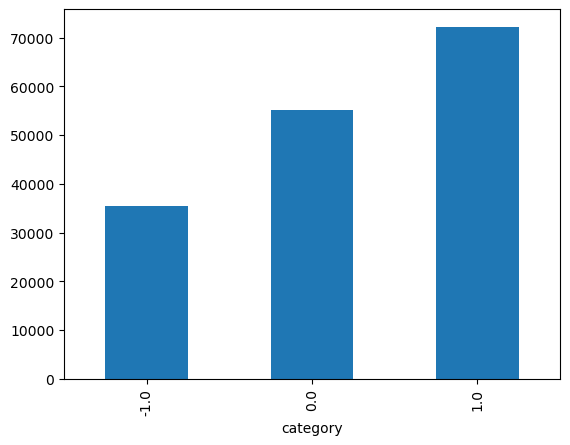

In [10]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

# data preprocessing
takes lot of time

In [ ]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [11]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Deepika
[nltk_data]     Sainju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
print([stemmer.stem(i) for i in data])
" ".join([stemmer.stem(i) for i in data])

['i', 'am', 'love', 'comput']


'i am love comput'

In [13]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")


'i am love comput'

In [ ]:
# Data Cleaning removing stopwords

In [14]:
news = ''
data = "i am loving computing".split()
for i in data:
  if i not in words:  # i stopwords haina vane news ma save hunxa
    news = news + " " +i
news

' loving computing'

In [15]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['clean_text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['clean_text']] #a-z ra A-Z bahek sabalai hatako
df['clean_text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['clean_text']))
df

C:\Users\Deepika Sainju\AppData\Local\Temp\ipykernel_7236\2510326521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['clean_text']] #a-z ra A-Z bahek sabalai hatako
C:\Users\Deepika Sainju\AppData\Local\Temp\ipykernel_7236\2510326521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['clean_text']))


,clean_text,category
37590,income tax dept raises crore sale nirav modis ...,0.0
98930,nirav modi case hearing london court today ind...,0.0
43942,reason narendra modi decided blow satellite sk...,0.0
129992,congress leader chacko says prime minister nar...,-1.0
11384,modi government already giving much promising,1.0
...,...,...
50365,modi govt good govt always want govt,1.0
7849,boss want fake anyway per guys anti modi good ...,-1.0
102096,modi talking black money get done promises tel...,1.0
20380,certainly better time announcement shouldve co...,1.0


In [16]:
df.to_csv('cleaned_twitter_data.csv')

In [ ]:
pwd

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [ ]:
# print(words)

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [17]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer() 

X = df['clean_text'] #indepedent 
Y = df['category'] #dependent

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer), #vectorizer = TfidfVectorizer()
                     ('chi',  SelectKBest(chi2, k=2000)), #each news bata 2000 words choose gara vaneko
                     ('clf', LogisticRegression(random_state=1,max_iter=1000))]) #logistic regression classifier use gara vaneko



# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [18]:
X_test

113248    modi last years diplomacy brought brave heart ...
101265                                     achievement modi
46273     current announcement modi hence place vote bjp...
113232    thought raulvinci alone special abilities woma...
5687         owaisi brothers target modi chowkidar campaign
                                ...                        
117723    malik take modi statement well market showchannel
60732     dubbing bjp ysrcp husband wife andhra pradesh ...
139873              hello ravinar jiwill guj give modi year
10978     modis become rahul alrightdont know swamy alre...
41542                      victory modi sold entire country
Name: clean_text, Length: 24446, dtype: object

In [19]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test) #x_test ma vayeko news ko category predict gareko
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.8965474924322998


In [22]:
# file = open('news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]} # input news lai dictionary ma change gareko
news_data_df = pd.DataFrame(news_data) # dataframe ma change gareko
# news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = i like the movie
Predicted news category =  0.0


In [23]:
from sklearn.metrics import classification_report, confusion_matrix 
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test))) #predefined function
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

        -1.0       0.89      0.77      0.83      5398
         0.0       0.86      0.98      0.92      8217
         1.0       0.93      0.90      0.91     10831

    accuracy                           0.90     24446
   macro avg       0.89      0.88      0.89     24446
weighted avg       0.90      0.90      0.90     24446

[[4175   79  426]
 [ 588 8012  675]
 [ 635  126 9730]]


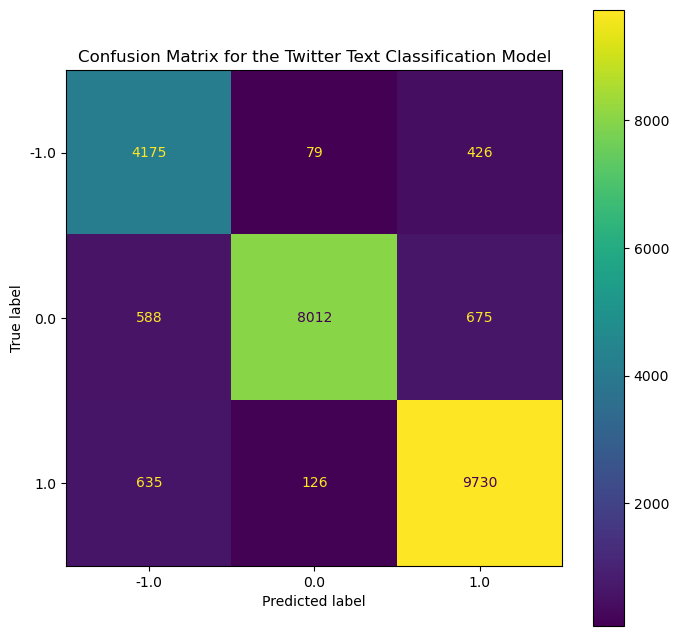

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['-1.0','0.0','1.0']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Twitter Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);